In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('RestaurantVisitors.csv')

In [4]:
df.head()

,date,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
0,1/1/2016,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
1,1/2/2016,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2,1/3/2016,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
3,1/4/2016,Monday,0,na,23.0,18.0,32.0,32.0,105.0
4,1/5/2016,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [6]:
df1 = df.dropna()
df1.tail()

,date,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
473,4/18/2017,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
474,4/19/2017,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
475,4/20/2017,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
476,4/21/2017,Friday,0,na,38.0,53.0,36.0,38.0,165.0
477,4/22/2017,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [8]:
cols = ['rest1','rest2','rest3','rest3','total']
for col in cols:
    df[col] = df1[col].astype(int)
df1.head()


,date,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
0,1/1/2016,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
1,1/2/2016,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2,1/3/2016,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
3,1/4/2016,Monday,0,na,23.0,18.0,32.0,32.0,105.0
4,1/5/2016,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


[Text(0.5, 0, ''), Text(0, 0.5, 'visitons per day ')]

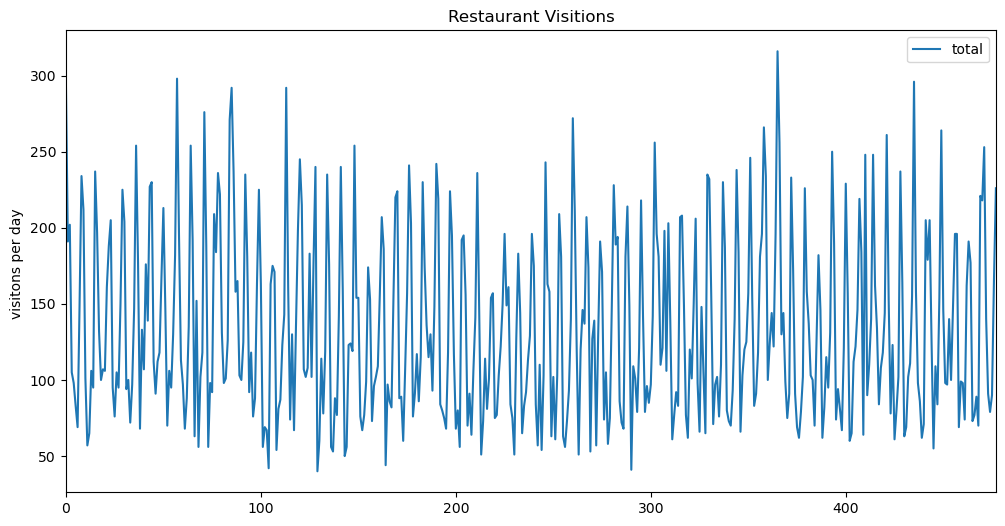

In [10]:
title = 'Restaurant Visitions'
ylabel = 'visitons per day '
xlabel = ''

ax = df['total'].plot(legend=True, figsize=(12, 6), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

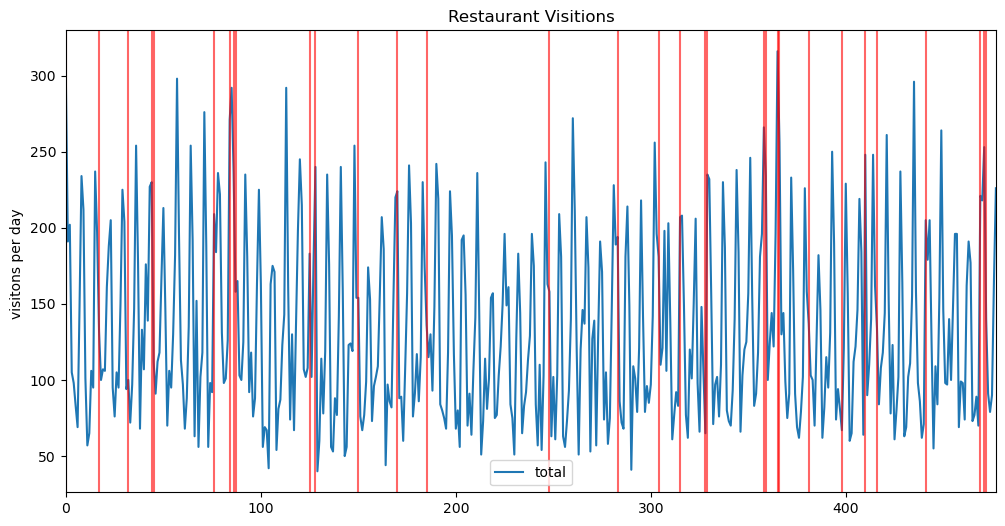

In [14]:
title = 'Restaurant Visitions'
ylabel = 'visitons per day '
xlabel = ''

ax = df['total'].plot(legend=True, figsize=(12, 6), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in df1.query('holiday==1').index:
    ax.axvline(x=x, color='red', alpha=0.6);

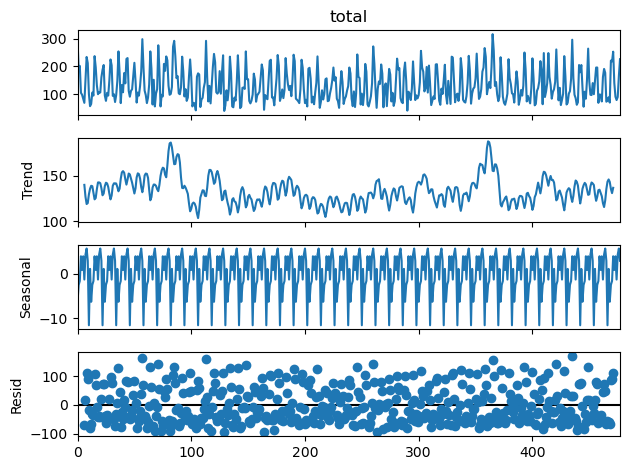

In [16]:
result = seasonal_decompose(df1['total'], period=12)
result.plot();


In [20]:
from statsmodels.tsa.stattools import adfuller
 
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
 
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [21]:
adf_test(df['total'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -5.592497
p-value                   0.000001
# lags used              18.000000
# observations          459.000000
critical value (1%)      -3.444677
critical value (5%)      -2.867857
critical value (10%)     -2.570135
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [23]:
auto_arima(df1['total'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2390.291
Date:                   Thu, 31 Oct 2024   AIC                           4788.581
Time:                           09:22:12   BIC                           4805.260
Sample:                                0   HQIC                          4795.138
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.4765      2.191      2.956      0.003       2.182      10.771
ar.S.L7        0.9484      0.017     56.693      0.000       0.916       0.981
ma.S.L7       -0.6961      0.058    -12.086      0.000      -0.809      -0.583
sigma2      1386.7835     92.675     14.964      0.000    1205.144    1568.424
===================================================================================
Ljung-Box (L1) (Q):                  16.17   Jarque-Bera (JB):                55.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.70
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
len(df1)

478

In [25]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define and fit the SARIMAX model
model = SARIMAX(train['total'], order=(1,0,0), seasonal_order=(2,0,1,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 7)   Log Likelihood               -2155.531
Date:                             Thu, 31 Oct 2024   AIC                           4321.061
Time:                                     09:25:34   BIC                           4341.449
Sample:                                          0   HQIC                          4329.107
                                             - 436                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2180      0.044      4.918      0.000       0.131       0.305
ar.S.L7        0.9997      0.057     17.562      0.000       0.888       1.111
ar.S.L14       0.0001      0.057      0.002      0.998      -0.111       0.112
ma.S.L7       -0.9381      0.025    -37.584      0.000      -0.987      -0.889
sigma2      1078.8982     55.303     19.509      0.000     970.506    1187.290
===================================================================================
Ljung-Box (L1) (Q):                   0.92   Jarque-Bera (JB):               106.21
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.77
Prob(H) (two-sided):                  0.60   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(1,0,0)(2,0,1,7) Predictions')

In [41]:
for i in range(len(predictions)):
    print(f"predicted = {predictions.iloc[i]:<11.10}, expected = {df1['total'].iloc[i]}")

predicted = 185.9507952, expected = 296.0
predicted = 90.82632998, expected = 191.0
predicted = 100.5043891, expected = 202.0
predicted = 96.9060107 , expected = 105.0
predicted = 98.64278836, expected = 98.0
predicted = 140.5728709, expected = 83.0
predicted = 235.5339336, expected = 69.0
predicted = 172.7479565, expected = 149.0
predicted = 87.93694234, expected = 234.0
predicted = 99.85813282, expected = 212.0
predicted = 96.75442416, expected = 101.0
predicted = 98.59854152, expected = 57.0
predicted = 140.5453207, expected = 65.0
predicted = 235.5018106, expected = 106.0
predicted = 172.7211897, expected = 95.0
predicted = 87.92292232, expected = 237.0
predicted = 99.84194088, expected = 197.0
predicted = 96.73868652, expected = 132.0
predicted = 98.58249255, expected = 100.0
predicted = 140.5224404, expected = 107.0
predicted = 235.4634701, expected = 106.0
predicted = 172.6930705, expected = 161.0
predicted = 87.90860844, expected = 188.0
predicted = 99.82568662, expected = 205.